In [17]:
import nipy
import numpy as np
import matplotlib.pyplot as plt
import nipy.modalities.fmri.hrf as hrf

%matplotlib inline

In [18]:
def HRF(volume, TR, task, rest):
    diff = abs(task[0] - rest[0])
    times = np.arange(0, volume, 1)
    event_block = np.zeros(volume)
    
    for i in task:
        event_block[(times >= i) & ( times < i+ diff)] = 1
        
    plt.plot(times, event_block)
    plt.xlabel('Vlume')
    plt.ylabel('neural signal')
    plt.ylim(0, 1.2)
    plt.title("block_task")
    plt.savefig('picture/ex_task_controll.png')
    plt.show()
    
    #BOLD Response
    hrf_times = np.linspace(0, diff*TR, diff*TR)
    hrf_signal = hrf.spm_hrf_compat(hrf_times)
    plt.title('hemodynamic response function')
    plt.plot(hrf_times, hrf_signal)
    plt.savefig('picture/HemodynamicResponseFunction.png')
    plt.show()
    
    #Convolution
    bold_signal = np.convolve(event_block, hrf_signal)
    bold_signal = bold_signal[:volume]
    plt.plot(bold_signal)
    plt.xlabel('Vlume')
    plt.ylabel('bold signal')
    plt.title('convolution HRF and Block')
    plt.savefig('picture/convolution_HRFandBlock.png')
    plt.show()
    
    return bold_signal

In [19]:
task = [24]
rest = [0]
for i in range(5):
    task.append(task[i] + 48)
    rest.append(rest[i] + 48)

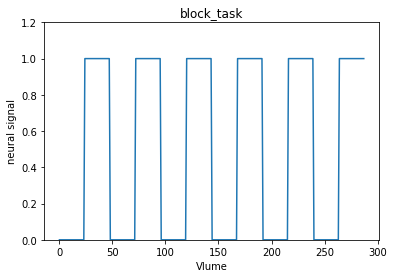

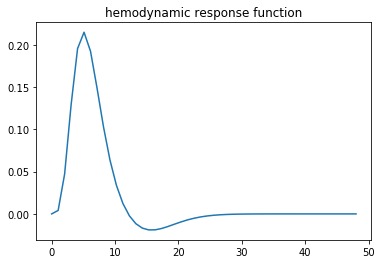

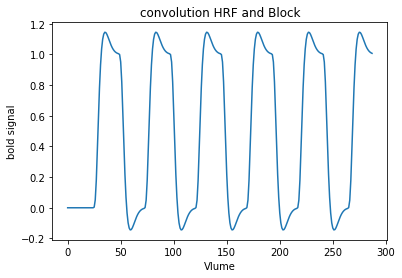

In [20]:
bold_signal = HRF(288, 2, task, rest)

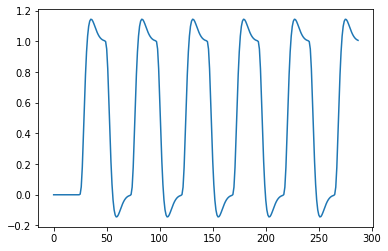

In [9]:
plt.plot(bold_signal)
plt.show()